In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import random

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
from tensorflow.keras.preprocessing import text

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
import seaborn as sns

In [19]:
reviews = pd.read_csv('Dataset/Coursera_reviews.csv')
courses = pd.read_csv('Dataset/Coursera_courses.csv')

In [20]:
merged_reviews_courses = pd.merge(reviews,courses,on = 'course_id')
merged_reviews_courses.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [21]:
print(merged_reviews_courses.shape)

(1454711, 8)


In [22]:
top_reviewed_courses = merged_reviews_courses.name.value_counts()
top_reviewed_courses.head(10)

Programming for Everybody (Getting Started with Python)                           45218
Machine Learning                                                                  35895
Neural Networks and Deep Learning                                                 35750
Technical Support Fundamentals                                                    35319
Python Data Structures                                                            33546
Learning How to Learn: Powerful mental tools to help you master tough subjects    32265
AI For Everyone                                                                   21630
Excel Skills for Business: Essentials                                             21251
What is Data Science?                                                             21087
The Science of Well-Being                                                         20085
Name: name, dtype: int64

In [23]:
top_reviewed_courses.index

Index(['Programming for Everybody (Getting Started with Python)',
       'Machine Learning', 'Neural Networks and Deep Learning',
       'Technical Support Fundamentals', 'Python Data Structures',
       'Learning How to Learn: Powerful mental tools to help you master tough subjects',
       'AI For Everyone', 'Excel Skills for Business: Essentials',
       'What is Data Science?', 'The Science of Well-Being',
       ...
       'COVID-19 Contact Tracing For Nursing Professionals',
       'The Business of Product Management I',
       'Spanish for Successful Communication in Healthcare Settings',
       'Social and Economic Networks:  Models and Analysis',
       'Curanderismo: Traditional Healing Using Plants',
       'Introduction to Healthcare',
       'Entrepreneurship Strategy: From Ideation to Exit',
       'Epigenetic Control of Gene Expression',
       'Entreprise et changement climatique',
       'Building Modern Python Applications on AWS'],
      dtype='object', length=603)

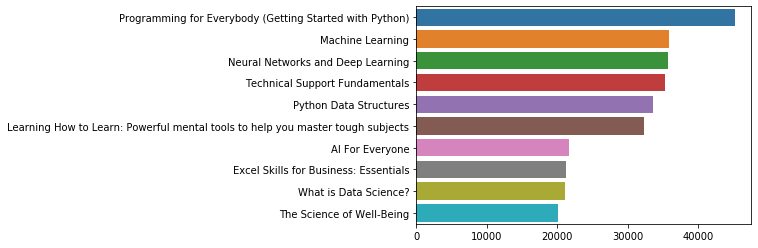

In [24]:
sns.barplot(x = top_reviewed_courses.head(10).values ,y =top_reviewed_courses.head(10).index)

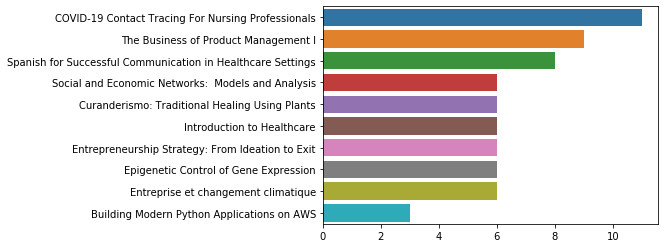

In [25]:
sns.barplot(x = top_reviewed_courses.tail(10).values ,y =top_reviewed_courses.tail(10).index)

In [26]:
top_reviewed_institution = merged_reviews_courses.institution.value_counts()
top_reviewed_institution.head(10)

University of Michigan                167069
DeepLearning.AI                       117029
Google                                 78613
IBM                                    70769
University of Pennsylvania             70531
Stanford University                    63504
University of California San Diego     59589
Johns Hopkins University               57149
Yale University                        51850
Google Cloud                           49285
Name: institution, dtype: int64

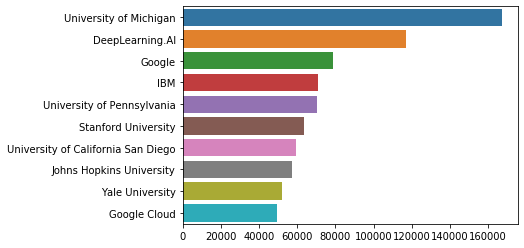

In [27]:
sns.barplot(x = top_reviewed_institution.head(10).values ,y =top_reviewed_institution.head(10).index)

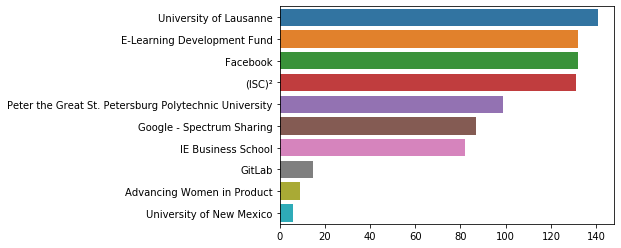

In [28]:
sns.barplot(x = top_reviewed_institution.tail(10).values ,y =top_reviewed_institution.tail(10).index)

In [29]:
merged_reviews_courses.groupby(['institution'])['rating'].mean().sort_values(ascending  = False)

institution
GitLab                               5.000000
UCL School of Management             4.948276
Google - Spectrum Sharing            4.931034
Hebrew University of Jerusalem       4.928451
The University of Chicago            4.921771
                                       ...   
IE Business School                   4.012195
Yandex                               3.424138
New York Institute of Finance        3.402174
Saint Petersburg State University    3.328431
University of New Mexico             1.000000
Name: rating, Length: 132, dtype: float64

In [30]:
df=pd.read_csv('Dataset/Coursera_reviews.csv')

In [31]:
df.head(5)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [32]:
df.shape

(1454711, 5)

In [33]:
df.isna().any()

reviews          True
reviewers       False
date_reviews    False
rating          False
course_id       False
dtype: bool

In [34]:
df.isna().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df['reviews'][20]

'very helpful informative course to get CPI certificate'

In [37]:
print(df['course_id'].unique().shape)
print(df['rating'].unique().shape)

(604,)
(5,)


In [38]:
MAX_WORDS = 8000 

In [39]:
df['reviews'][0]

"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that.  As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken.  Never found the suplimental material that the course references... but who cares... i passed!"

In [40]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df['reviews'])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(counts,df['rating'],test_size=0.3)
classifier = MultinomialNB()
model=classifier.fit(x_train,y_train)
model.score(x_test,y_test)

0.8114154895364506

In [42]:
x_train[1]

<1x108508 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [43]:
model.class_count_

array([ 12137.,  11468.,  33816., 158858., 801920.])

In [44]:
examples=['The course is perfect and I liked it, very engaging and fun!']
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array([5], dtype=int64)

In [45]:
vectorizer = CountVectorizer(stop_words='english',min_df=30)
counts = vectorizer.fit_transform(df['reviews'])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(counts,df['rating'],test_size=0.3)
classifier = MultinomialNB()
model=classifier.fit(x_train,y_train)
model.score(x_test,y_test)

0.7935752064752092

In [47]:
vectorizer = CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(df['reviews'])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(counts,df['rating'],test_size=0.3)
classifier = MultinomialNB()
model=classifier.fit(x_train,y_train)
model.score(x_test,y_test)

0.8061905896803645

In [49]:
def get_pred(word):
    examples=[word]
    example_counts = vectorizer.transform(examples)
    predictions = classifier.predict(example_counts)
    return predictions

get_pred('I hate it, boring and tedious')

array([3], dtype=int64)

In [50]:
def get_pred_from_test(word):
    predictions = classifier.predict(word)
    return predictions

In [51]:
type(y_test)

pandas.core.series.Series

In [52]:
len(y_test)

436372

In [53]:
print(int(get_pred_from_test(x_test[1])))

3


In [54]:
for i in range(1,101):
    if int(get_pred(df['reviews'][i])) == df['rating'][i]:
        print('comment :', df['reviews'][i],'\n',
              'prediction : ',get_pred(df['reviews'][i]),'\n',
              'actual : ',df['rating'][i])

comment : Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues! 
 prediction :  [4] 
 actual :  4
comment : Some of the quizzes contained material not explicitly covered in the course.  
 prediction :  [4] 
 actual :  4
comment : Probably the best certification course I've taken in this respect. The course is planned out carefully, and I believe gave me everything I needed to ace my exam the first time around. The trainer for the majority of the course was awesome. She delivered the material in a great, professional mannor, but was never boring or monotoned.  
 prediction :  [5] 
 actual :  5
comment : Great course, lectures were straight forward and easy to follow along.  The course provided all the information necessary to pass the CPI examination for certification. 
 prediction :  [5] 
 actual :  5
comment : The co

comment : Not at all legitimate course. The concepts and principles of the course, instructor are not clear. I'm a stock market trader and in one of his quiz the answer of one his question was stop loss at 50% value down. According to this very soon you will find yourself at the footpark. More over he's find out to be staying in the history all the time. 
 prediction :  [1] 
 actual :  1


In [55]:
t = Tokenizer(num_words=MAX_WORDS)

In [56]:
t.fit_on_texts(df['reviews'])

In [57]:
word_index=t.word_index
word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'course': 4,
 'a': 5,
 'i': 6,
 'of': 7,
 'this': 8,
 'in': 9,
 'is': 10,
 'it': 11,
 'for': 12,
 'very': 13,
 'you': 14,
 'was': 15,
 'great': 16,
 'good': 17,
 'that': 18,
 'with': 19,
 'me': 20,
 'are': 21,
 'on': 22,
 'have': 23,
 'really': 24,
 'learning': 25,
 'my': 26,
 'but': 27,
 'more': 28,
 'be': 29,
 'as': 30,
 'well': 31,
 'not': 32,
 'thank': 33,
 'about': 34,
 'excellent': 35,
 'lot': 36,
 'so': 37,
 'learn': 38,
 'an': 39,
 'de': 40,
 'all': 41,
 'from': 42,
 'how': 43,
 'much': 44,
 'some': 45,
 'understand': 46,
 'would': 47,
 'curso': 48,
 'y': 49,
 'easy': 50,
 'thanks': 51,
 'can': 52,
 'like': 53,
 'interesting': 54,
 'were': 55,
 'learned': 56,
 'way': 57,
 'useful': 58,
 'will': 59,
 'knowledge': 60,
 'one': 61,
 'que': 62,
 'who': 63,
 'if': 64,
 'what': 65,
 'also': 66,
 'helpful': 67,
 'best': 68,
 'by': 69,
 'data': 70,
 'python': 71,
 'muy': 72,
 'at': 73,
 'amazing': 74,
 'concepts': 75,
 'content': 76,
 'recommend': 77,
 '

In [58]:
df['reviews']=t.texts_to_sequences(df['reviews'])

In [59]:
X_train,X_test,y_train,y_test = train_test_split(df['reviews'],df['rating'], test_size = 0.2)

In [60]:
review_length = [len(x) for x in X_train]
print(max(review_length))
print(min(review_length))

1314
0


In [61]:
from tensorflow.keras.preprocessing import sequence

In [62]:
input_limit = 500 
X_train = sequence.pad_sequences(X_train,maxlen=input_limit) 
X_test = sequence.pad_sequences(X_test,maxlen=input_limit)

In [63]:
y_train.unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [64]:
print(y_train[0])

4


In [65]:
from tensorflow.keras.utils import to_categorical

In [66]:
y_train = to_categorical(y_train-1,num_classes=5)

In [67]:
y_test = to_categorical(y_test-1,num_classes=5)

In [68]:
y_train[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [69]:
X_test,X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5)

In [70]:
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=16,input_length=input_limit))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(5,activation='softmax'))
    return model

In [71]:
model = create_model()

In [72]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           128000    
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               800100    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 928,605
Trainable params: 928,605
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_checkpoint = ModelCheckpoint('best.hdf5',save_best_only=True)
model.fit(X_train,y_train, validation_data=(X_valid,y_valid),batch_size=64, epochs=10, callbacks=[model_checkpoint])

Epoch 1/10
18183/18183 [==============================] - 174s 10ms/step - loss: 0.4801 - accuracy: 0.8266 - val_loss: 0.4488 - val_accuracy: 0.8369
Epoch 2/10
18183/18183 [==============================] - 179s 10ms/step - loss: 0.4101 - accuracy: 0.8517 - val_loss: 0.4150 - val_accuracy: 0.8519
Epoch 3/10
18183/18183 [==============================] - 168s 9ms/step - loss: 0.3631 - accuracy: 0.8704 - val_loss: 0.3912 - val_accuracy: 0.8640
Epoch 4/10
18183/18183 [==============================] - 169s 9ms/step - loss: 0.3315 - accuracy: 0.8827 - val_loss: 0.3759 - val_accuracy: 0.8719
Epoch 5/10
18183/18183 [==============================] - 170s 9ms/step - loss: 0.3088 - accuracy: 0.8911 - val_loss: 0.3680 - val_accuracy: 0.8772
Epoch 6/10
18183/18183 [==============================] - 172s 9ms/step - loss: 0.2908 - accuracy: 0.8982 - val_loss: 0.3665 - val_accuracy: 0.8819
Epoch 7/10
18183/18183 [==============================] - 174s 10ms/step - loss: 0.2771 - accuracy: 0.9031 - v

In [74]:
model.load_weights('best.hdf5')
score= model.evaluate(X_test,y_test)
score[1]

4546/4546 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.89 - 7s 2ms/step - loss: 0.3577 - accuracy: 0.8950


0.8949723839759827

In [75]:
reviews_df = pd.read_csv('Dataset/Coursera_reviews.csv')

In [76]:
reviews_df.drop(["reviewers","reviewers","course_id","date_reviews"], axis=1, inplace=True)

In [77]:
reviews_df.head()

,reviews,rating
0,"Pretty dry, but I was able to pass with just t...",4
1,would be a better experience if the video and ...,4
2,Information was perfect! The program itself wa...,4
3,A few grammatical mistakes on test made me do ...,4
4,Excellent course and the training provided was...,4


In [78]:
reviews_df.dropna(inplace=True)

In [79]:
reviews_df["split"] = reviews_df.apply(lambda x: "train" if random.randrange(0,100) > 10 else "valid", axis=1)

In [80]:
reviews_df["split"].value_counts()

train    1295004
valid     159567
Name: split, dtype: int64

In [81]:
df_train = reviews_df[reviews_df["split"] == "train"]
df_val = reviews_df[reviews_df["split"] == "valid"]

In [82]:
df_train

,reviews,rating,split
0,"Pretty dry, but I was able to pass with just t...",4,train
1,would be a better experience if the video and ...,4,train
2,Information was perfect! The program itself wa...,4,train
3,A few grammatical mistakes on test made me do ...,4,train
4,Excellent course and the training provided was...,4,train
...,...,...,...
1454706,g,5,train
1454707,.,5,train
1454708,.,5,train
1454709,.,5,train


In [83]:
tokenizer=Tokenizer(oov_token="'oov'")
tokenizer.fit_on_texts(df_train['reviews'])

In [84]:
maxlen = 200
train_X = pad_sequences(tokenizer.texts_to_sequences(df_train['reviews']), maxlen=maxlen)
val_X = pad_sequences(tokenizer.texts_to_sequences(df_val['reviews']), maxlen=maxlen)

In [85]:
train_Y = df_train["rating"]
val_Y = df_val["rating"]
train_Y_cat = to_categorical(df_train["rating"]-1, num_classes=5)
val_Y_cat = to_categorical(df_val["rating"]-1, num_classes=5)

In [86]:
embedding_index = {}
f = open(os.path.join('glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 400000 word vectors 


In [87]:
max_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

In [88]:
def create_bilstm_model():
    model=Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="linear"))
    return model

In [89]:
model = create_bilstm_model()

In [90]:
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['mse'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          11153200  
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 11,188,305
Trainable params: 35,105
Non-trainable params: 11,153,200
_________________________________________________________________
None


In [91]:
model.fit(train_X, train_Y, epochs=10, batch_size=256, validation_data=(val_X, val_Y))

Epoch 1/10
5059/5059 [==============================] - 1976s 391ms/step - loss: 8.2714 - mse: 8.2714 - val_loss: 1.0992 - val_mse: 1.0992
Epoch 2/10
5059/5059 [==============================] - 2004s 396ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 3/10
5059/5059 [==============================] - 2038s 403ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 4/10
5059/5059 [==============================] - 2064s 408ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 5/10
5059/5059 [==============================] - 2044s 404ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 6/10
5059/5059 [==============================] - 2280s 451ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 7/10
5059/5059 [==============================] - 2128s 421ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 8/10
5059/5059 [=====

In [92]:
pred = model.predict(val_X)

In [93]:
pred_hard = np.array([round(p[0]) for p in pred])

In [94]:
pred_hard[pred_hard < 1] = 1
pred_hard[pred_hard > 5] = 5

In [95]:
np.unique(pred_hard)

array([5.], dtype=float32)

In [96]:
accuracy_score(val_Y, pred_hard)

0.7892045347722273